In [ ]:
#base http://kitchingroup.cheme.cmu.edu/blog/2013/02/21/Phase-portraits-of-a-system-of-ODEs/

from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

In [236]:
def equilibrio(x, t, mi, b1, b2, teta, psi, b0, m, y_n, i_ext, p_ext):
  p, s = x
  ds = ((psi*b1*s)/(teta+psi*b2)) + (p-psi*b1*p)/(teta+psi*b2) -i_ext + (psi*b0 + psi*b1*p_ext - m)/(teta + psi*b2);
  dp = ((mi*teta*b1*s)/(teta + psi*b2)) +((-mi*(teta*b1+b2)*p)/(teta+psi*b2)) - mi*y_n + (mi*teta*b1*p_ext + mi*b0 + mi*b2*m)/(teta + psi*b2);
  return dp,ds

In [ ]:
y0 = [80.22, 1.5]
mi = 0.01
b1 = 20
b2 = 0.1
teta = 0.05
psi = 0.05
b0 = 500
m = 100
y_n = 2000
i_ext = 3
p_ext = 0


In [ ]:
#definindo o espaço vetorial trabalhado

y1 = np.linspace(0, 100, 60) #e
y2 = np.linspace(-50,50, 60)

Y1, Y2 = np.meshgrid(y1, y2)

In [ ]:
u, v = np.zeros(Y1.shape), np.zeros(Y2.shape)
NI, NJ = Y1.shape
t = 0
for i in range(NI):
    for j in range(NJ):
        x = Y1[i, j]
        y = Y2[i, j]
        yprime = equilibrio([x, y], t,mi, b1, b2, teta, psi, b0, m, y_n, i_ext, p_ext)
        u[i,j] = yprime[0]
        v[i,j] = yprime[1]

/usr/local/lib/python3.6/dist-packages/scipy/integrate/odepack.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


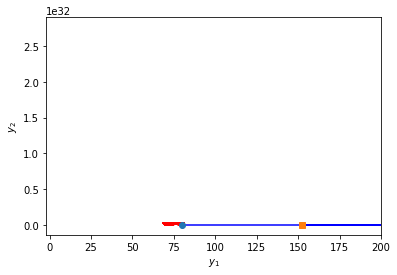

In [ ]:
Q = plt.quiver(Y1, Y2, u, v, color='r')  
plt.xlabel('$y_1$')
plt.ylabel('$y_2$')

for y20 in np.arange(0,1,1):
    t = np.linspace(0, 60, 10)
    y0 = [80.22, 1.5]
    ys = odeint(equilibrio,y0, t, args=(mi, b1, b2, teta, psi, b0, m, y_n, i_ext, p_ext))
    plt.plot(ys[:,0], ys[:,1], 'b-') # path
    plt.plot([ys[0,0]], [ys[0,1]], 'o') # start
    plt.plot([ys[-1,0]], [ys[-1,1]], 's') # end
plt.xlim([-2, 200])
plt.show()

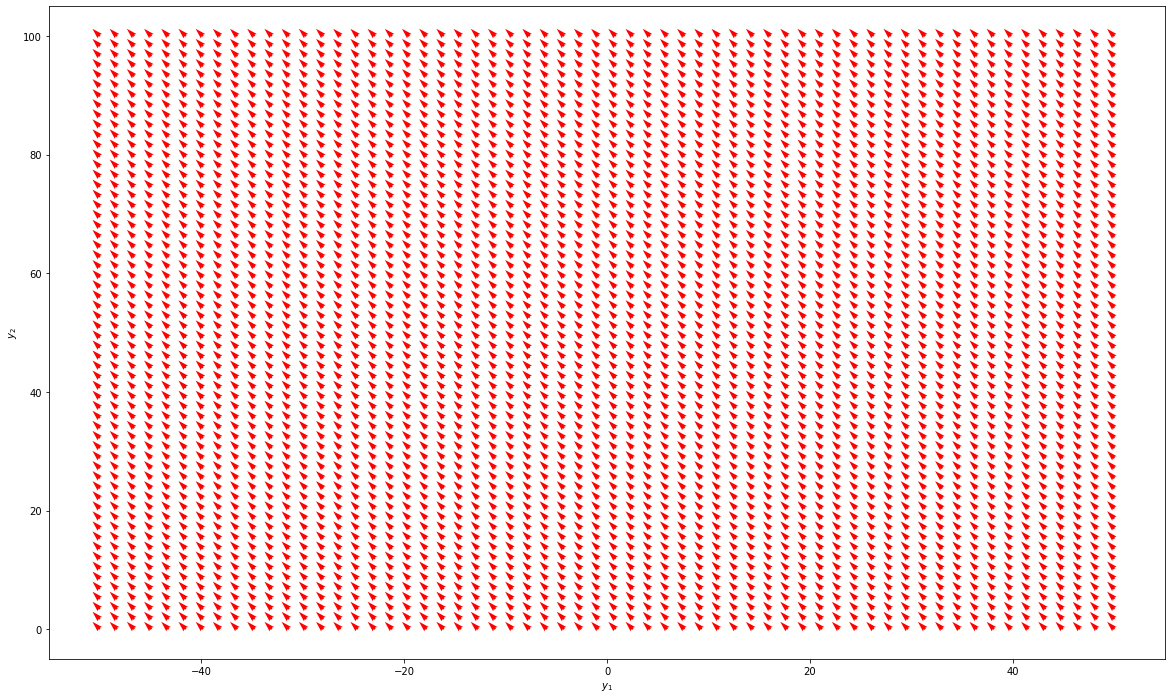

In [ ]:
fig= plt.figure(figsize=(20,12))

u = u / np.sqrt(u**2 + v**2);
v = v / np.sqrt(u**2 + v**2);
Q = plt.quiver(Y2, Y1, u, v, color='r', scale=None, scale_units='inches')
#Q = plt.quiver(Y2, Y1, u, v, color='r') #x, y,
plt.xlabel('$y_1$')
plt.ylabel('$y_2$')
plt.savefig('phase-portrait.png')

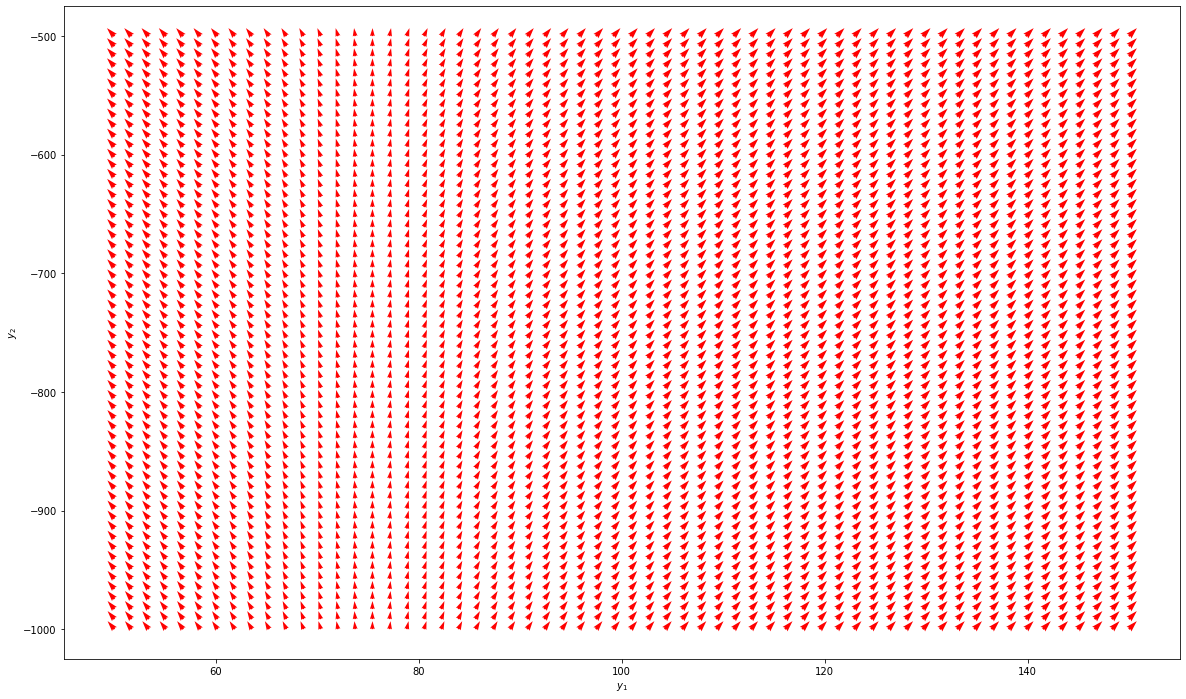

In [ ]:
#definindo o espaço vetorial trabalhado

y1 = np.linspace(-1000, -500, 60) #e
y2 = np.linspace(50, 150, 60)

Y1, Y2 = np.meshgrid(y1, y2)

u, v = np.zeros(Y1.shape), np.zeros(Y2.shape)
NI, NJ = Y1.shape
t = 0
for i in range(NI):
    for j in range(NJ):
        x = Y1[i, j]
        y = Y2[i, j]
        yprime = equilibrio([x, y], t,mi, b1, b2, teta, psi, b0, m, y_n, i_ext, p_ext)
        u[i,j] = yprime[0]
        v[i,j] = yprime[1]
fig= plt.figure(figsize=(20,12))

u = u / np.sqrt(u**2 + v**2);
v = v / np.sqrt(u**2 + v**2);
Q = plt.quiver(Y2, Y1,  u, v, color='r', scale=None, scale_units='inches')
#Q = plt.quiver(Y2, Y1, u, v, color='r') #x, y,
plt.xlabel('$y_1$')
plt.ylabel('$y_2$')
plt.savefig('phase-portrait.png')

In [ ]:
def equilibrio(x, t, mi, b1, b2, teta, psi, b0, m, y_n, i_ext, p_ext):
  s, p = x
  ds = ((psi*b1*s)/(teta+(psi*b2))) + (p-(psi*b1*p))/(teta+(psi*b2)) -i_ext + (psi*b0 + psi*b1*p_ext - m)/(teta + psi*b2);
  dp = ((mi*teta*b1*s)/(teta + psi*b2)) +((-mi*((teta*b1)+b2)*p)/(teta+(psi*b2))) - mi*y_n + (mi*teta*b1*p_ext + mi*b0 + mi*b2*m)/(teta + psi*b2);
  return ds,dp

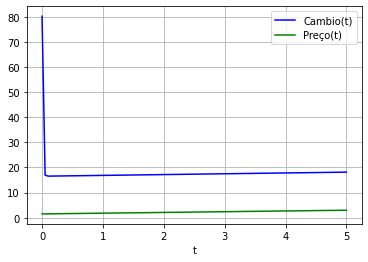

In [ ]:
#trocao sinal do b1
t = np.linspace(0,5, 100)

y0 = [80.22, 1.5]
mi = 0.0001
b1 = -20        #negativo?
b2 = 0.1
teta = 0.05
psi = 0.5
b0 = 500
m = 101
y_n = 2000
i_ext = 3
p_ext = 0


solving = odeint(equilibrio,y0, t, args=(mi, b1, b2, teta, psi, b0, m, y_n, i_ext, p_ext))


plt.plot(t, solving[:, 0], 'b', label='Cambio(t)')

plt.plot(t, solving[:, 1], 'g', label='Preço(t)')

plt.legend(loc='best')

plt.xlabel('t')

plt.grid()

plt.show()

#nao deveria sair isso

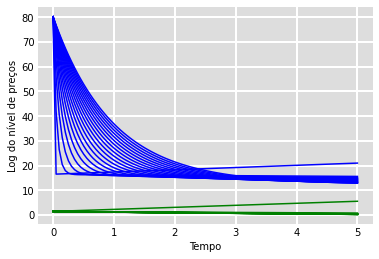

In [ ]:
y0 = [80.22, 1.5]
mi = 0.0001
b1 = -20        #negativo?
b2 = 0.1
teta = 0.05
psi = 0.5
b0 = 500
m = 101
y_n = 2000
i_ext = 3
p_ext = 0


fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, axisbelow=True)
ax.set_facecolor('#dddddd')



#for teta in [0, 0.5, 1, 1.5, 2, 2.5]:
for teta in np.arange(0,10,0.5):
    #ax.plot(t,precos(t,-0.2), 'b', alpha=0.5, lw=2, label='v=-0.2')
    #ax.plot(t,precos(t,-0.3), 'g', alpha=0.5, lw=2, label='v=-0.3')
    #ax.plot(t,precos(t,-0.4), 'y', alpha=0.5, lw=2, label='v=-0.4')
    solving = odeint(equilibrio,y0, t, args=(mi, b1, b2, teta, psi, b0, m, y_n, i_ext, p_ext))


    plt.plot(t, solving[:, 0], 'b', label='Cambio(t)')

    plt.plot(t, solving[:, 1], 'g', label='Preço(t)')


ax.set_xlabel('Tempo')
ax.set_ylabel("Log do nível de preços")
#ax.set_ylabel("Câmbio nominal")
    #ax.set_ylim(0,2.5)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw='2', ls='-')
#legend = ax.legend()
#legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

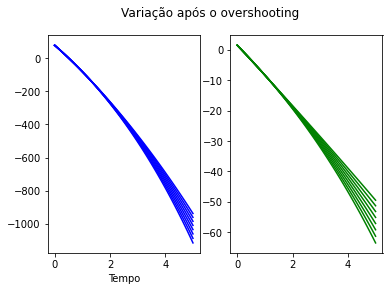

In [154]:
mi = 0.01
b1 = 20       #negativo?
b2 = 0.1
teta = 0.5
psi = 0.05
b0 = 500
m = 101
y_n = 2000
i_ext = 3
p_ext = 0

fig, (ax1, ax2) = plt.subplots(1,2)
fig.suptitle('Variação após o overshooting')

ax1.set_xlabel('Tempo')
ax.set_ylabel("Log do nível de preços")
#ax.set_ylabel("Câmbio nominal")
ax.set_ylim(0,100)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax1.grid(b=True, which='major', c='w', lw='2', ls='-')

'''
for b2 in np.arange(-28,-20,1):
    #ax.plot(t,precos(t,-0.2), 'b', alpha=0.5, lw=2, label='v=-0.2')
    #ax.plot(t,precos(t,-0.3), 'g', alpha=0.5, lw=2, label='v=-0.3')
    #ax.plot(t,precos(t,-0.4), 'y', alpha=0.5, lw=2, label='v=-0.4')
    solving = odeint(equilibrio,y0, t, args=(mi, b1, b2, teta, psi, b0, m, y_n, i_ext, p_ext))


    ax1.plot(t, solving[:, 0], 'b', label='Cambio(t)')

    ax2.plot(t, solving[:, 1], 'g', label='Preço(t)')

'''

for b1 in np.arange(0.1,0.9,0.1):
    #ax.plot(t,precos(t,-0.2), 'b', alpha=0.5, lw=2, label='v=-0.2')
    #ax.plot(t,precos(t,-0.3), 'g', alpha=0.5, lw=2, label='v=-0.3')
    #ax.plot(t,precos(t,-0.4), 'y', alpha=0.5, lw=2, label='v=-0.4')
    solving = odeint(equilibrio,y0, t, args=(mi, b1, b2, teta, psi, b0, m, y_n, i_ext, p_ext))


    ax1.plot(t, solving[:, 0], 'b', label='Cambio(t)')

    ax2.plot(t, solving[:, 1], 'g', label='Preço(t)')


#legend = ax.legend()
#legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)



plt.show()

In [160]:
def check(mi, teta, b1, b2):
  if (-(mi*b1/teta) < 0) and (mi*(b1 + b2/teta) + (4*mi*b1)/teta > 0):
    print("Equilibrio ponto de sela")
  else:
    print("deu ruim")

In [161]:
check(mi,teta,b1,b2)


Equilibrio ponto de sela


In [166]:
mi_novo = 0.01
teta_novo = 0.3
b1_novo = 0.4
b2_novo = 0.2

check(mi_novo,teta_novo,b1_novo,b2_novo)

Equilibrio ponto de sela


In [167]:
A = np.array([[-mi_novo*(b1_novo+b2_novo/teta_novo), (mi_novo*b1_novo)], [(1/teta_novo), 0]])


In [169]:
import scipy.linalg as la

In [171]:
la.eig(A)[0]

array([-0.12092649+0.j,  0.11025982+0.j])

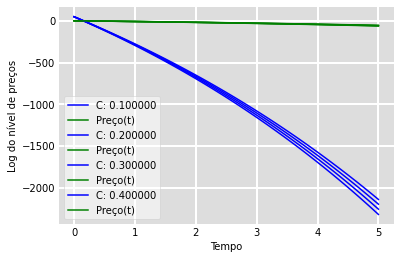

In [190]:
y0 = [50, 1.5]
psi = 0.05
b0 = 30
m = 100
y_n = 1000
i_ext = 3
p_ext = 1


fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, axisbelow=True)
ax.set_facecolor('#dddddd')



#for teta in [0, 0.5, 1, 1.5, 2, 2.5]:
for b2_novo in np.arange(0.1,0.5,0.1):
    #ax.plot(t,precos(t,-0.2), 'b', alpha=0.5, lw=2, label='v=-0.2')
    #ax.plot(t,precos(t,-0.3), 'g', alpha=0.5, lw=2, label='v=-0.3')
    #ax.plot(t,precos(t,-0.4), 'y', alpha=0.5, lw=2, label='v=-0.4')
    solving = odeint(equilibrio,y0, t, args=(mi_novo, b1_novo, b2_novo, teta_novo, psi, b0, m, y_n, i_ext, p_ext))


    plt.plot(t, solving[:, 0], 'b', label='C: %f' % b2_novo)

    plt.plot(t, solving[:, 1], 'g', label='Preço(t)')


ax.set_xlabel('Tempo')
ax.set_ylabel("Log do nível de preços")
#ax.set_ylabel("Câmbio nominal")
    #ax.set_ylim(0,2.5)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw='2', ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

In [205]:
def preco_lp(m, psi, y, teta, i_ext):
    return m-psi*y+teta*i_ext

def cambio_lp(b0, b1, m, psi,b2,y,teta, i_ext,p_ext):
    #ta errado
    return  (-(b0/b1))+m+y*((1-psi*b2)/b1)+((teta*b1 + b2)/b1)*i_ext -p_ext

def overshootado(b2, mi, m_old, m_new, e_old):
  dedm = 1 + 1/(b2*mi)
  
  diff = m_new - m_old
  
  return (diff * e_old * dedm)

In [192]:
#antes expansao
preco_lp(m,psi,y_n,teta_novo,i_ext)

50.9

In [199]:
e_old = cambio_lp(b0, b1_novo, m, psi, b2_novo, y_n, teta_novo, i_ext, p_ext)
e_old

2477.8999999999996

In [194]:
#depois expansao
m_1 = 101
preco_lp(m_1,psi,y_n,teta_novo,i_ext)

51.9

In [196]:
cambio_lp(b0, b1_novo, m_1, psi, b2_novo, y_n, teta_novo, i_ext, p_ext)


2478.8999999999996

In [209]:
e_inicial = overshootado(b2_novo, mi_novo, m, m_1, e_old )
#wrong

251.0


In [207]:
overshootado(0.1,0.01,100,101,76.52)

1001.0


76596.51999999999

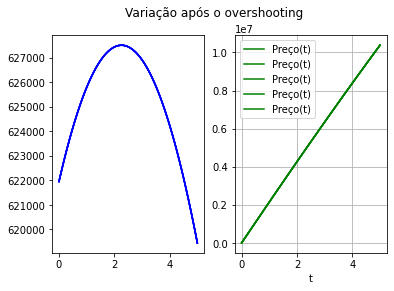

In [245]:
mi_novo = 0.01
teta_novo = 0.3
b1_novo = -0.10
b2_novo = -0.2

y0 = [e_inicial, 1]
psi = 0.05
b0 = 30
m = 100
y_n = 1000
i_ext = 3
p_ext = 1

t = np.linspace(0,5, 100)
#fig = plt.figure(facecolor='w')
#ax = fig.add_subplot(111, axisbelow=True)
#ax.set_facecolor('#dddddd')

fig, (ax1, ax2) = plt.subplots(1,2)
fig.suptitle('Variação após o overshooting')

for p in np.arange(1,1.5,0.1):
    y0[1] = p
    #ax.plot(t,precos(t,-0.2), 'b', alpha=0.5, lw=2, label='v=-0.2')
    #ax.plot(t,precos(t,-0.3), 'g', alpha=0.5, lw=2, label='v=-0.3')
    #ax.plot(t,precos(t,-0.4), 'y', alpha=0.5, lw=2, label='v=-0.4')
    solving = odeint(equilibrio,y0, t, args=(mi_novo, b1_novo, b2_novo, teta_novo, psi, b0, m_1, y_n, i_ext, p_ext))


    ax1.plot(t, solving[:, 0], 'b', label='Cambio(t)')
    ax2.plot(t, solving[:, 1], 'g', label='Preço(t)')

plt.legend(loc='best')

plt.xlabel('t')

plt.grid()

plt.show()

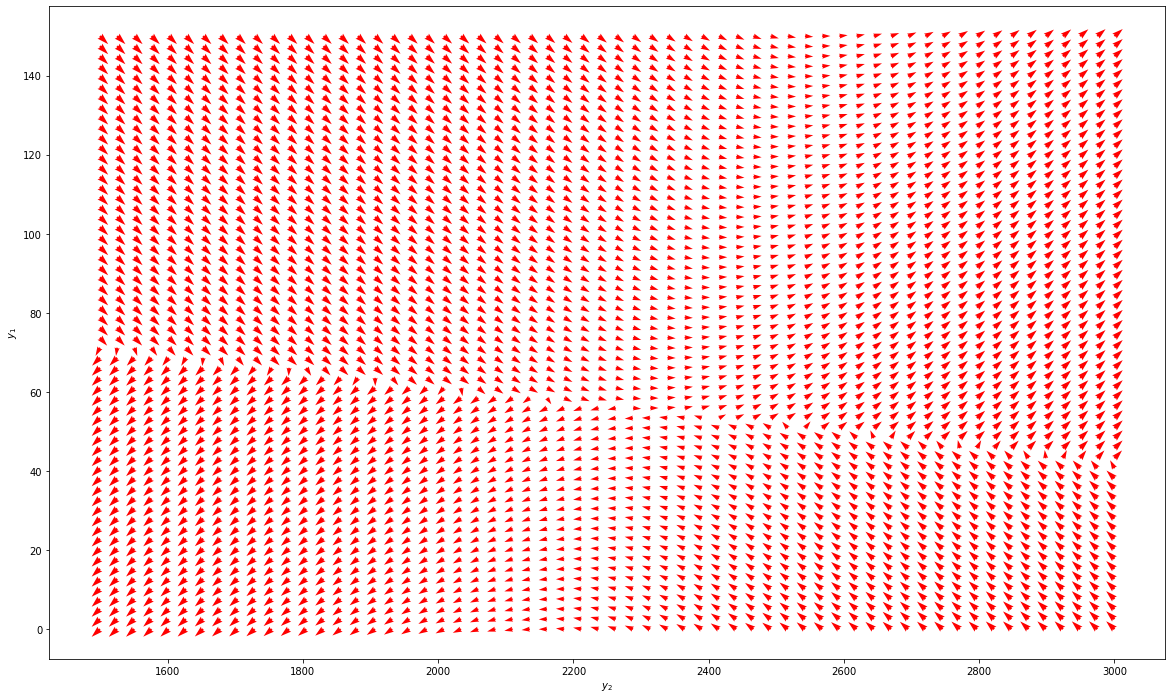

In [227]:
#definindo o espaço vetorial trabalhado

y1 = np.linspace(1500, 3000, 60) #e
y2 = np.linspace(0, 150, 60)

Y1, Y2 = np.meshgrid(y1, y2)

u, v = np.zeros(Y1.shape), np.zeros(Y2.shape)
NI, NJ = Y1.shape
t = 0
for i in range(NI):
    for j in range(NJ):
        x = Y1[i, j]
        y = Y2[i, j]
        
        #yprime = equilibrio([x, y], t,mi, b1, b2, teta, psi, b0, m, y_n, i_ext, p_ext)
        #solving = odeint(equilibrio,y0, t, args=(mi_novo, b1_novo, b2_novo, teta_novo, psi, b0, m_1, y_n, i_ext, p_ext))
        yprime = equilibrio([x, y],t, mi_novo, b1_novo, b2_novo, teta_novo, psi, b0, m_1, y_n, i_ext, p_ext)
        u[i,j] = yprime[0]
        v[i,j] = yprime[1]
fig= plt.figure(figsize=(20,12))

u = u / np.sqrt(u**2 + v**2);
v = v / np.sqrt(u**2 + v**2);
Q = plt.quiver(Y1, Y2,  u, v, color='r', scale=None, scale_units='inches')
#Q = plt.quiver(Y2, Y1, u, v, color='r') #x, y,
plt.xlabel('$y_2$')
plt.ylabel('$y_1$')
plt.savefig('phase-portrait.png')

"\nfor p in np.arange(1,10,1):\n    y0[1] = p\n    t = np.linspace(0, 60, 10)\n    ys = odeint(equilibrio,y0, t, args=(mi_novo, b1_novo, b2_novo, teta_novo, psi, b0, m_1, y_n, i_ext, p_ext))\n    plt.plot(ys[:,0], ys[:,1], 'b-') # path\n    plt.plot([ys[0,0]], [ys[0,1]], 'o') # start\n    plt.plot([ys[-1,0]], [ys[-1,1]], 's') # end\nplt.xlim([-2, 200])\nplt.show()"

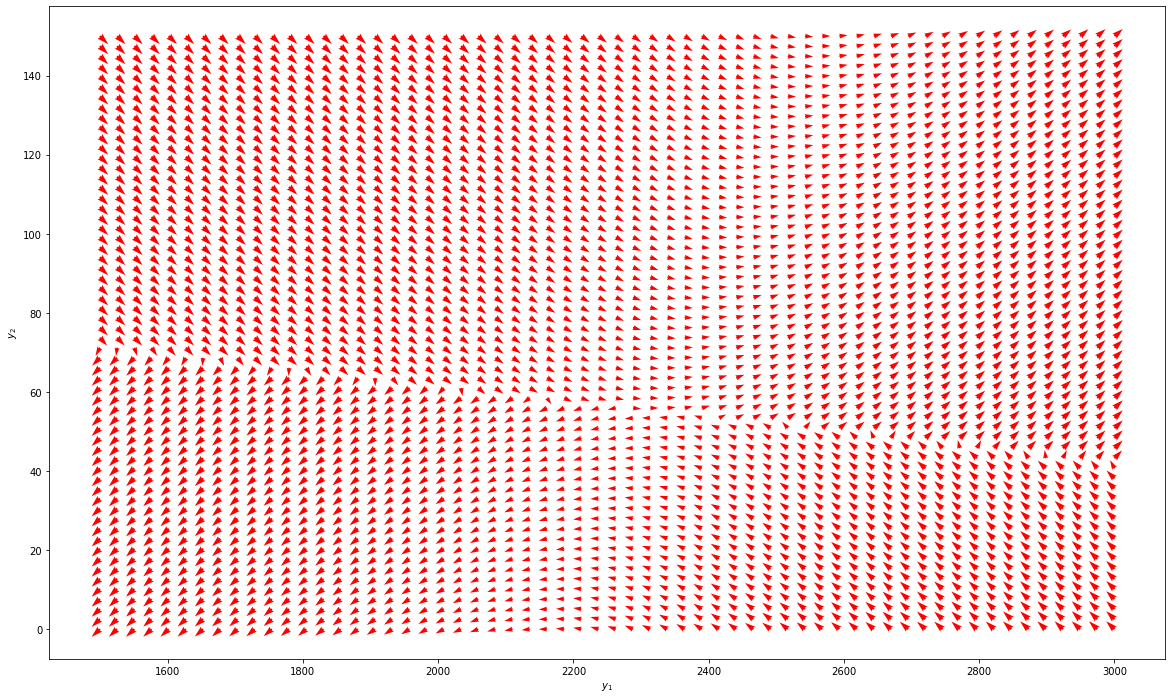

In [231]:
#definindo o espaço vetorial trabalhado

y1 = np.linspace(1500, 3000, 60) #e
y2 = np.linspace(0, 150, 60)

Y1, Y2 = np.meshgrid(y1, y2)

u, v = np.zeros(Y1.shape), np.zeros(Y2.shape)
NI, NJ = Y1.shape
t = 0
for i in range(NI):
    for j in range(NJ):
        x = Y1[i, j]
        y = Y2[i, j]
        
        #yprime = equilibrio([x, y], t,mi, b1, b2, teta, psi, b0, m, y_n, i_ext, p_ext)
        #solving = odeint(equilibrio,y0, t, args=(mi_novo, b1_novo, b2_novo, teta_novo, psi, b0, m_1, y_n, i_ext, p_ext))
        yprime = equilibrio([x, y],t, mi_novo, b1_novo, b2_novo, teta_novo, psi, b0, m_1, y_n, i_ext, p_ext)
        u[i,j] = yprime[0]
        v[i,j] = yprime[1]
fig= plt.figure(figsize=(20,12))

u = u / np.sqrt(u**2 + v**2);
v = v / np.sqrt(u**2 + v**2);
Q = plt.quiver(Y1, Y2,  u, v, color='r', scale=None, scale_units='inches') 
plt.xlabel('$y_1$')
plt.ylabel('$y_2$')
'''
for p in np.arange(1,10,1):
    y0[1] = p
    t = np.linspace(0, 60, 10)
    ys = odeint(equilibrio,y0, t, args=(mi_novo, b1_novo, b2_novo, teta_novo, psi, b0, m_1, y_n, i_ext, p_ext))
    plt.plot(ys[:,0], ys[:,1], 'b-') # path
    plt.plot([ys[0,0]], [ys[0,1]], 'o') # start
    plt.plot([ys[-1,0]], [ys[-1,1]], 's') # end
plt.xlim([-2, 200])
plt.show()'''